In [1]:
# %matplotlib widget
# %matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import os
import sys
sys.path.insert(0, 'functions/')
from h5_tools import *
from fitting_tools import *
import numpy as np
# import h5py as h5
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import pickle

# plot general settings
mpl.rcParams.update({"axes.grid" : True, "grid.color": "gray", "grid.linestyle":":", "grid.alpha": "0.7"})
# from matplotlib.colors import LogNorm

In [3]:
h5dir = '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/h5-files/'

# Select run

In [4]:
!ls -l /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/h5-files/

total 41853344
-rw-rw-r--+ 1 mabi3848 hpc-users  120392345 Jul 11  2023 apo_conc_gly_50_2_0006.h5
-rw-rw-r--+ 1 mabi3848 hpc-users      23079 Jun 28  2023 background_0003.h5
-rw-rw-r--+ 1 mabi3848 hpc-users 1161373434 Jul 11  2023 ferritin_conc100_gly_50_1_0002.h5
-rw-rw-r--+ 1 mabi3848 hpc-users  703980477 Jul 11  2023 ferritin_conc100_gly_50_1_0006.h5
-rw-rw-r--+ 1 mabi3848 hpc-users 2330393309 Jul 11  2023 ferritin_conc100_gly_50_1_0009.h5
-rw-rw-r--+ 1 mabi3848 hpc-users 1144299172 Jul 11  2023 ferritin_conc100_gly_50_1_0010.h5
-rw-rw-r--+ 1 mabi3848 hpc-users 2461504414 Jul 11  2023 ferritin_conc100_gly_50_1_0012.h5
-rw-rw-r--+ 1 mabi3848 hpc-users 2539875762 Jul  5  2023 ferritin_conc100_gly_50_1_0013.h5
-rw-rw-r--+ 1 mabi3848 hpc-users 1604681690 Jul  5  2023 ferritin_conc100_gly_50_1_0014.h5
-rw-rw-r--+ 1 mabi3848 hpc-users  745507304 Jul 13  2023 ferritin_conc100_gly_50_2_0010.h5
-rw-rw-r--+ 1 mabi3848 hpc-users  527515584 Jul 13  2023 ferritin_conc100_gly_50_2_0011.h5
-rw-rw-

In [5]:
# apoferritin 240K tr 100%
# runname = 'apo_conc_gly_50_2'
# datasetnumber = 6

# # c1 fluxes 220K: 4 full beam, 5 45%, 6 22.5%
# runname = 'ferritin_conc_gly_50_5'
# datasetnumber = 4

# # temps full beam: 2 250K, 3 240K, 4 230K, 5 220K, 6 210K
runname = 'ferritin_conc_gly_50_6'
datasetnumber = 4

# # fluxes 220K: 4 full beam, 5 45%, 6 22.5%
# runname = 'ferritin_conc120_gly_50_2'
# datasetnumber = 2

# c3 temperatures 2,4,5,,7,8 
# runname = 'ferritin_conc120_gly_50_2'
# datasetnumber = 2

In [27]:
filename = h5dir + f'{runname}_{datasetnumber:04d}.h5'
if os.path.isfile(filename):
    print(filename, "\nFile exists: ", os.path.isfile(filename), "\n")
    info = elog_selected_entries_dict(filename)
    for key in info.keys():
        print("{0:20} {1}".format(key, info[key]))
else:
    print(filename, "\nFile exists: False")

/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/h5-files/ferritin_conc_gly_50_6_0004.h5 
File exists:  True 

measurement folder   ferritin_conc_gly_50_6_0004
Temperature, K       230.0
transmission (%)     100
Absorbers 80um       0.0
Absorbers 100um      0.0
Short comment        nan
comment              xpcs, 4 reps per spot, 230K, full beam
Exposure time (s)    0.0002
number of frames     5000.0


In [28]:
sample = info['measurement folder']
T = info['Temperature, K'][:-2]
Tr = info['transmission (%)']
t_exp = float(info['Exposure time (s)'])

# TTC intensity distribution

In [29]:
# with h5py.File(filename, 'r') as f: 
#     f.visititems(visit_func)

In [30]:
%%time
plot_ttc(filename, vs=(0,0.1))

KeyboardInterrupt: 

here (4990, 4990)


/tmp/ipykernel_7653/1388671836.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb1 = mpl.colorbar.ColorbarBase(divider.append_axes('right', size='5%', pad=0.05), cmap=mpl.cm.turbo,  orientation='vertical', norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax));


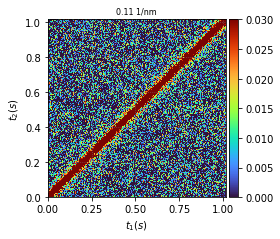

In [ ]:
ttc_qv = load_data(filename, '/xpcs/ttcs/q')
ttc_pars = load_data(filename, '/xpcs/ttcs/twotime_par')
time = load_data(filename, '/xpcs/ttcs/times')
q_sel = 0
rep = 0

# ttcs = np.empty(shape=(len(time), len(time)))
with h5py.File(filename, 'r') as f:
    ttc = np.mean(np.asarray(f['/xpcs/ttcs/ttc_rep_qs_avg_filtered'])[:,q_sel,:,:], axis=0)
print('here', np.shape(ttc))
# f, axs = plt.subplots(2,3,figsize=(10,6), tight_layout=True)
f, axs = plt.subplots(1,1,figsize=(4,4), tight_layout=True)
# for i in range(0,len(ttc_qv)):
#     ax = axs.ravel()[i]
norm = np.mean(ttc[:300,-300:])
    # vmax = np.mean(np.diag(ttcs[i,:,:],k=10))
vmin, vmax = 0, .03
axs.imshow(ttc[:,:]-norm, origin='lower', cmap='turbo', vmin=vmin, vmax=vmax, extent=(time[0],time[-1])*2 )
axs.set_xlabel('$t_1 (s)$')
axs.set_title(f'{ttc_qv[ttc_pars[q_sel]]:.2f} 1/nm', fontsize=8)
axs.set_ylabel('$t_2 (s)$')
divider = make_axes_locatable(axs)
cb1 = mpl.colorbar.ColorbarBase(divider.append_axes('right', size='5%', pad=0.05), cmap=mpl.cm.turbo,  orientation='vertical', norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax));

In [ ]:
# f, (a1,a2) = plt.subplots(1,2,figsize=(7,3.3), tight_layout=True)
# norm = np.mean(ttc[:300,-300:])
# axs = a1
# axs.imshow(ttc[:,:]-norm, origin='lower', cmap='turbo', vmin=0, vmax=.1, extent=(time[0],time[-1])*2 )
# axs.set_xlabel('$t_1 (s)$')
# axs.set_title(f'{ttc_qv[ttc_pars[q_sel]]:.2f} 1/nm', fontsize=8)
# axs.set_ylabel('$t_2 (s)$')
# axs.set_ylim(0,.5)
# axs.set_xlim(0,.5)

# t1, t2 = 10, 3500
# t_avg, tmax = 1100, 350

# g2s = []
# for t in range(t_avg):
#     # print("t1 ", t1+t, "tfin: ", t1+t+tmax)
#     g2s.append(ttc[t1+t  , t1+t : t1+t+tmax])
# a2.plot(time[:tmax], np.mean(g2s, axis=0), ls='', marker='o', c='g', mfc='none', ms=5, label=f'{time[t1]:.1e} s')

# g2s = []
# for t in range(t_avg):
#     # print("t1 ", t2+t, "tfin: ", t2+t+tmax)
#     g2s.append(ttc[t2+t  , t2+t : t2+t+tmax])
# a2.plot(time[:tmax], np.mean(g2s, axis=0), ls='', marker='o', c='C1',mfc='none', ms=5, label=f'{time[t2]:.1e} s')
# a2.set_xscale('log')
# a2.set_xlabel(r't (s)')
# a2.set_ylabel(r'$g_2(q,t)$')
# a2.legend()

In [ ]:
sample, T, Tr

('ferritin_conc_gly_50_6_0005', '220', '100')

# Correlation functions

In [ ]:
g2s = load_data(filename, 'xpcs/g2s/g2s_filtered')
dg2s = load_data(filename, 'xpcs/g2s/g2s_err')
delay = load_data(filename, 'xpcs/g2s/delay')
qv = load_data(filename, 'xpcs/g2s/q')

print(np.shape(g2s), np.shape(delay), np.shape(qv))

(4, 12, 80) (80,) (12,)


## Q-dependence

In [ ]:
beta_vs_q = np.load('../03-source/contrast_vs_q.npy')
beta_vs_q

array([0.15964507, 0.15949404, 0.15918963, 0.1587956 , 0.15834509,
       0.1576657 , 0.15686018, 0.15597819, 0.15482857, 0.15376757,
       0.15292362, 0.15141127])

### With kww=1

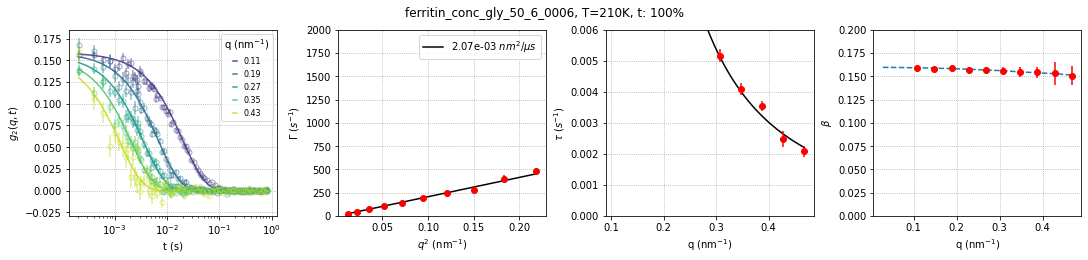

In [ ]:
f, (a1,a3,a4,a2) = plt.subplots(1,4, figsize=(15,3.5), constrained_layout=True)

rep = 0
taus, dtaus = [], []
betas, dbetas = [], []
tol = 5e-4
qmin, qmax, qstep = 2, len(qv), 1
col = plt.cm.viridis(np.linspace(0,1,qmax))

for i in range(qmin,qmax,qstep):
    base = np.average(g2s[rep,i,-15:])

    # -- fitting
    # popt,xc,curve,perr = fit(exponential, delay, g2s[rep,i,:]-base, p0=[beta_vs_q[i],5e-2], bounds=[(beta_vs_q[i]-tol,0),(beta_vs_q[i]+tol,np.infty)])
    popt,xc,curve,perr = fit(exponential, delay, g2s[rep,i,:]-base, sigma=dg2s[rep,i,:],p0=[beta_vs_q[i],5e-1], bounds=[(beta_vs_q[i]-tol,0),(beta_vs_q[i]+tol,np.infty)])
    
    if i in range(qmin,qmax,2):
        # a1.plot(delay, g2s[rep,i,:]-base, c=col[i], ls='', marker='o', ms=5, mfc='none', alpha=0.7)#, label=f'{qv[i]:.2f}')
        a1.errorbar(delay, g2s[rep,i,:]-base, dg2s[rep,i,:],c=col[i], ls='', marker='o', ms=5, mfc='none', alpha=0.5)
        a1.plot(xc, curve, c=col[i], ls='-', alpha=0.9, label=f'{qv[i]:.2f}')

#     a2.errorbar(qv[i], popt[0], perr[0], c='r', ls='', marker='o')
    taus.append(popt[1])
    dtaus.append(perr[1])
    betas.append(popt[0])
    dbetas.append(perr[0])

taus = np.asarray(taus)
popt,xc,curve,perr = fit(linear, qv[qmin:qmax:qstep]**2, 1/taus, sigma=dtaus/(taus**2), p0=[5e3])

# watch out the a3
a3.plot(xc, curve, c='k', label=f'{popt[0]*1e-6:.2e} ${{nm}}^{{2}}$/${{\mu s}}$')
# a3.plot(np.sqrt(xc), curve/xc, c='k', label=f'{popt[0]*1e-6:.2e} ${{nm}}^{{2}}$/${{\mu s}}$')
a4.plot(np.sqrt(xc), 1/curve, c='k', label=f'{popt[0]*1e-6:.2e} ${{nm}}^{{2}}$/${{\mu s}}$')
a3.errorbar(qv[qmin:qmax:qstep]**2, 1/taus, dtaus/(taus**2), c='r', ls='', marker='o')
a4.errorbar(qv[qmin:qmax:qstep], taus, dtaus, c='r', ls='', marker='o')
a2.errorbar(qv[qmin:qmax:qstep], betas, dbetas, c='r', ls='', marker='o')
a2.plot(qv, beta_vs_q, ls='--', label='estimations')

a1.legend(title=r'q (nm$^{-1}$)', fontsize=8, bbox_to_anchor=[1,1], handlelength=.5)
f.suptitle(f"{sample}, T={T}K, t: {Tr}%")
a1.set_xscale('log')
a1.set_xlabel(r't (s)')
a1.set_ylabel(r'$g_2(q,t)$')
a3.set_xlabel(r'$q^2$ (nm$^{-1}$)')
a3.set_ylabel(r'$\Gamma$ ($s^{-1}$)')
a3.set_ylim(0,2e3)#1e4)
a4.set_xlabel(r'q (nm$^{-1}$)')
a4.set_ylabel(r'$\tau$ ($s^{-1}$)')
a4.set_ylim(0,6e-3)
a2.set_xlabel(r'q (nm$^{-1}$)')
a2.set_ylabel(r'$\beta$')
a2.set_ylim(0,0.2)
a3.legend();

**Free contrast, kww=1**

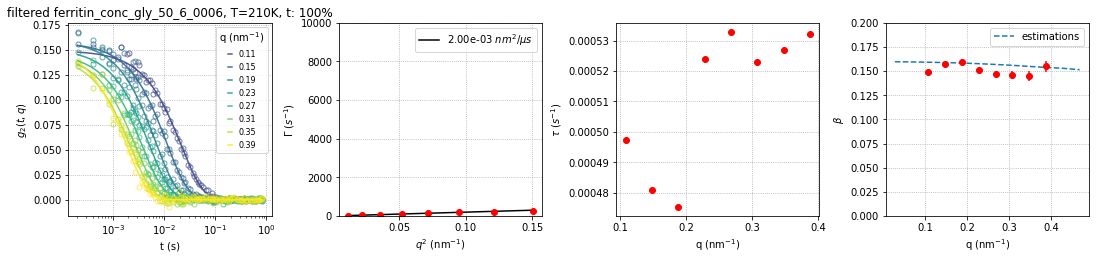

In [ ]:
f, (a1,a3,a4,a2) = plt.subplots(1,4, figsize=(15,3.5), constrained_layout=True)


rep = 0
taus, dtaus = [], []
betas, dbetas = [], []
tol = 1e0
qmin, qmax, qstep = 2, len(qv)-2, 1
col = plt.cm.viridis(np.linspace(0,1,qmax))

for i in range(qmin,qmax,qstep):
    base = np.average(g2s[rep,i,-15:])
    a1.plot(delay, g2s[rep,i,:]-base, c=col[i], ls='', marker='o', ms=5, mfc='none', alpha=0.7)#, label=f'{qv[i]:.2f}')
    
    # -- fitting
    popt,xc,curve,perr = fit(exponential, delay, g2s[rep,i,:]-base, sigma=dg2s[rep,i,:], p0=[beta_vs_q[i],5e-2], bounds=[(beta_vs_q[i]-1e-2,0),(beta_vs_q[i]+1e-2,np.infty)])
    a1.plot(xc, curve, c=col[i], ls='-', alpha=0.9, label=f'{qv[i]:.2f}')
#     a2.errorbar(qv[i], popt[0], perr[0], c='r', ls='', marker='o')
    taus.append(popt[1])
    dtaus.append(perr[1])
    betas.append(popt[0])
    dbetas.append(perr[0])

taus = np.asarray(taus)
popt,xc,curve,perr = fit(linear, qv[qmin:qmax:qstep]**2, 1/taus, sigma=dtaus/(taus**2), p0=[5e3])

# watch out the a3
a3.plot(xc, curve, c='k', label=f'{popt[0]*1e-6:.2e} ${{nm}}^{{2}}$/${{\mu s}}$')
# a3.plot(np.sqrt(xc), curve/xc, c='k', label=f'{popt[0]*1e-6:.2e} ${{nm}}^{{2}}$/${{\mu s}}$')
# a4.plot(np.sqrt(xc), 1/curve, c='k', label=f'{popt[0]*1e-6:.2e} ${{nm}}^{{2}}$/${{\mu s}}$')
a3.errorbar(qv[qmin:qmax:qstep]**2, 1/taus, dtaus/(taus**2), c='r', ls='', marker='o')
a4.plot(qv[qmin:qmax:qstep], taus*qv[qmin:qmax:qstep]*qv[qmin:qmax:qstep], c='r', ls='', marker='o')
a2.errorbar(qv[qmin:qmax:qstep], betas, dbetas, c='r', ls='', marker='o')
a2.plot(qv, beta_vs_q, ls='--', label='estimations')

a1.legend(title=r'q (nm$^{-1}$)', fontsize=8, bbox_to_anchor=[1,1], handlelength=.5)
a1.set_title(f"filtered {sample}, T={T}K, t: {Tr}%")
a1.set_xscale('log')
a1.set_xlabel(r't (s)')
a1.set_ylabel(r'$g_2(t,q)$')
a3.set_xlabel(r'$q^2$ (nm$^{-1}$)')
a3.set_ylabel(r'$\Gamma$ ($s^{-1}$)')
a3.legend()
a3.set_ylim(0,1e4)
a4.set_xlabel(r'q (nm$^{-1}$)')
a4.set_ylabel(r'$\tau$ ($s^{-1}$)')
# a4.set_ylim(0,6e-3)
a2.set_xlabel(r'q (nm$^{-1}$)')
a2.set_ylabel(r'$\beta$')
a2.set_ylim(0,.2)
a2.legend();

### Free kww

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


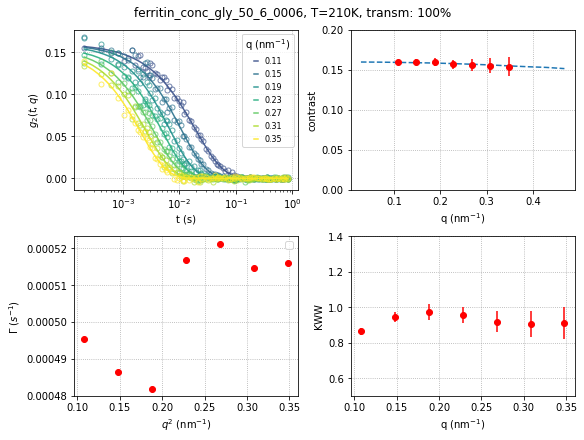

In [ ]:
f, ((a1,a2),(a3,a4)) = plt.subplots(2,2,figsize=(8,6), constrained_layout=True)
tol = 1e-3
rep = 0
taus, dtaus = [], []
qmin, qmax, qstep = 2, len(qv)-3, 1
col = plt.cm.viridis(np.linspace(0,1,qmax))

for i in range(qmin, qmax, qstep):
    base = np.average(g2s[rep,i,-15:])
    a1.plot(delay, g2s[rep,i,:]-base, c=col[i], ls='', marker='o', ms=5, mfc='none', alpha=0.7)#, label=f'{qv[i]:.2f}')
    
    # -- fitting
    popt,xc,curve,perr = fit(exponential_kww, delay, g2s[rep,i,:]-base, sigma=dg2s[rep,i,:], p0=[beta_vs_q[i],5e-2,1.], bounds=[(beta_vs_q[i]-tol,0,0),(beta_vs_q[i]+tol,np.infty,2)])
    # popt,xc,curve,perr = fit(exponential_kww, delay, g2s[rep,i,:]-base, sigma=dg2s[rep,i,:], p0=[beta_vs_q[i],5e-2,1.], bounds=[(beta_vs_q[i]-tol,0,0),(beta_vs_q[i]+tol,np.infty,2)])
    a1.plot(xc, curve, c=col[i], ls='-', alpha=0.9, label=f'{qv[i]:.2f}')
    
    a2.errorbar(qv[i], popt[0], perr[0], c='r', ls='', marker='o')
    a4.errorbar(qv[i], popt[-1], perr[-1], c='r', ls='', marker='o')
    taus.append(popt[1])
    dtaus.append(perr[1])

taus = np.asarray(taus)
# popt,xc,curve,perr = fit(linear, qv[qmin:qmax:qstep]**2, 1/taus, sigma=dtaus/(taus**2), p0=[5e3])
# a3.plot(xc, curve, c='k', label=f'{popt[0]*1e-6:.2e} ${{nm}}^{{2}}$/${{\mu s}}$')
# a4.plot(np.sqrt(xc), 1/curve, c='k', label=f'{popt[0]*1e-6:.2e} ${{nm}}^{{2}}$/${{\mu s}}$')
# a3.errorbar(qv[qmin:qmax:qstep]**2, 1/taus, dtaus/(taus**2), c='r', ls='', marker='o')
# a3.errorbar(qv[qmin:qmax:qstep], taus*qv[qmin:qmax:qstep]*qv[qmin:qmax:qstep], dtaus, c='r', ls='', marker='o')
a3.plot(qv[qmin:qmax:qstep], taus*qv[qmin:qmax:qstep]*qv[qmin:qmax:qstep], c='r', ls='', marker='o')

# a4.plot(qv[1:], taus, c='r', ls='', mrker='o')
a2.plot(qv, beta_vs_q, ls='--', label='estimations')

a1.legend(title=r'q (nm$^{-1}$)', fontsize=8, bbox_to_anchor=[1,1], handlelength=.5)
a1.set_xscale('log')
a1.set_xlabel(r't (s)')
a1.set_ylabel(r'$g_2(t,q)$')
a2.set_xlabel(r'q (nm$^{-1}$)')
a2.set_ylabel('contrast')
a2.set_ylim(0,.2)
a3.set_xlabel(r'$q^2$ (nm$^{-1}$)')
a3.set_ylabel(r'$\Gamma$ ($s^{-1}$)')
# a3.set_ylim(0,1e4)
a4.set_xlabel(r'q (nm$^{-1}$)')
a4.set_ylabel('KWW')
a4.set_ylim(0.5,1.4)
f.suptitle(f"{sample}, T={T}K, transm: {Tr}%")
a3.legend();

## Repetitions

0: D=5.12e-03 nm^2/us
1: D=5.02e-03 nm^2/us
2: D=4.87e-03 nm^2/us
3: D=4.85e-03 nm^2/us


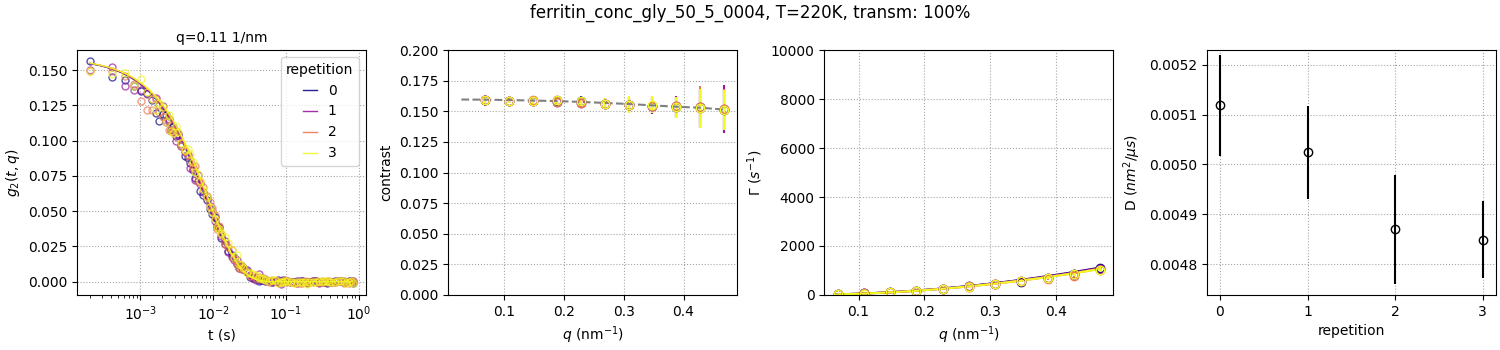

In [26]:
f, (a1,a2,a3,a4) = plt.subplots(1,4, figsize=(15,3.5), constrained_layout=True)
reps = np.arange(0,4)
col = plt.cm.plasma(np.linspace(0,1,len(reps)))
tol = 5e-4
q_sel = 2
D, dD = [], []

for rep in reps:
    taus, dtaus = [], []
    contr,dcontr = [], []
    for i in range(1,len(qv)):
        base = np.average(g2s[rep,i,-15:])
        # -- fit
        popt,xc,curve,perr = fit(exponential, delay, g2s[rep,i,:]-base,  sigma=dg2s[rep,i,:], p0=[beta_vs_q[i],5e-2], bounds=[(beta_vs_q[i]-tol,0),(beta_vs_q[i]+tol,np.infty)])
        
        taus.append(popt[1])
        dtaus.append(perr[1])
        contr.append(popt[0])
        dcontr.append(perr[0])
        if i == q_sel: 
            a1.plot(delay, g2s[rep,i,:]-base, c=col[rep], ls='', marker='o', ms=5, mfc='none',  alpha=0.7)#, label=f'{qv[i]:.2f}')
            a1.plot(xc, curve, c=col[rep], ls='-', lw=1, alpha=0.9, label=f'{rep}')
            
    taus = np.asarray(taus)
    popt,xc,curve,perr = fit(linear, qv[1:]**2, 1/taus, sigma=dtaus/(taus**2), p0=[5e3])
    a3.plot(np.sqrt(xc), curve, c=col[rep], label=f'{rep}')
    a3.errorbar(qv[1:], 1/taus, dtaus/(taus**2), c=col[rep], ls='', marker='o', mfc='none')
    a2.errorbar(qv[1:], contr, dcontr, c=col[rep], ls='', marker='o', mfc='none')
    D.append(popt[0]*1e-6)
    dD.append(perr[0]*1e-6)
    print(f"{rep}: D={popt[0]*1e-6:.2e} nm^2/us")
a4.errorbar(reps, D, dD, c='k', ls='', marker='o', mfc='none')
a2.plot(qv, beta_vs_q, ls='--', c='gray', label='estimations')

f.suptitle(f"{sample}, T={T}K, transm: {Tr}%")
a1.legend(title=r'repetition', fontsize=10, bbox_to_anchor=[1,1], handlelength=1)
a1.set_title(f'q={qv[q_sel]:.2f} 1/nm', fontsize=10)
# a1.set_xlim(0,0.1)
# a1.set_ylim(1e-7,2e-1)
a1.set_xscale('log')
a1.set_xlabel(r't (s)')
a1.set_ylabel(r'$g_2(t,q)$')
a3.set_xlabel(r'$q$ (nm$^{-1}$)')
a3.set_ylabel(r'$\Gamma$ ($s^{-1}$)')
a3.set_ylim(0,1e4)
a2.set_xlabel(r'$q$ (nm$^{-1}$)')
a2.set_ylabel(r'contrast')
a2.set_ylim(0,.2)
# a4.set_xlabel(r'q (nm$^{-1}$)')
# a4.set_ylabel(r'$\tau$ ($s^{-1}$)')
a4.set_xlabel(r'repetition')
a4.set_ylabel(r'D ($nm^{2}/\mu s$)')
a4.set_xticks(reps)
a4.set_ylim(np.min(D)-np.std(D), np.max(D)+np.std(D));

# a3.legend(handlelength=.5);

# Scattering intensity

In [27]:
# with h5py.File(filename, 'r') as f: 
#     f.visititems(visit_func)

In [28]:
Iqs_reps = load_data(filename, '/saxs/I_reps_filtered') # (4, 1000)
Iqs = load_data(filename, '/saxs/I') # (448, 1000)
qI = load_data(filename, '/saxs/q') # 1000
reps = np.arange(0,len(Iqs_reps))

print(np.shape(Iqs_reps), np.shape(Iqs), np.shape(qI))

(4, 1000) (448, 1000) (1000,)


**Reptitions**

(0.007403941824159991, 0.489053312922053)

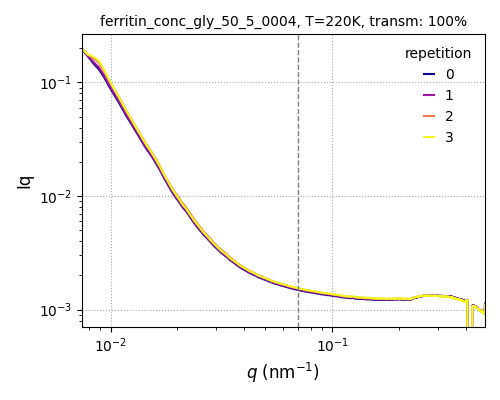

In [29]:
f, (a1) = plt.subplots(1,1, figsize=(5,4), tight_layout=True)
col = plt.cm.plasma(np.linspace(0,1,len(reps)))

q_index = 170
for i in range(0,len(reps)):
    a1.plot(qI, Iqs_reps[i,:], ls='-', c=col[i], label=i)

a1.axvline(x=7e-2, c='gray', ls='--', lw=1) # index 170
# a1.axvline(x=e-1, c='gray', ls='--', lw=1) # index 710

a1.set_title(f"{sample}, T={T}K, transm: {Tr}%", fontsize=10)
a1.set_xlabel(r'$q$ (nm$^{-1}$)', fontsize=12)
a1.set_ylabel('Iq', fontsize=12)
a1.set_xscale('log')
a1.set_yscale('log')
a1.legend(title='repetition', handlelength=.7, frameon=False)
a1.set_xlim(qI[0],qI[-1])
# a1.set_xlim(.02,.5)
# a1.set_ylim(0,2e-3)

**Background**

In [30]:
# water/glycerol
f = np.load("../03-source/backgrounds.npz")
f.files
Iq_bkg = np.average(f['Iq'][:2,:], axis=0)
q_bkg = f['q']
t_exp_bkg = 1e-1

# apoferritin
# f = np.load("../03-source/Iqs_apo_conc_gly_50_2_0006.npz")
# f.files
# Iq_apo = np.average(f['Iqs'],axis=0)
# q_apo = f['q']
# t_exp_apo = 5e-3

In [31]:
t_exp

0.0002

(0.1, 1.0)

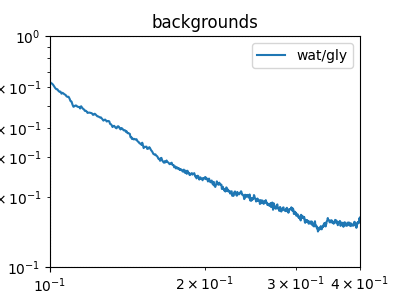

In [32]:
plt.figure(figsize=(4,3))

# plt.plot(q_apo, Iq_apo/t_exp_apo, label='apo')
plt.plot(q_bkg, Iq_bkg/t_exp_bkg, label='wat/gly')
# plt.axvline(x=0.23)

plt.legend()
plt.title('backgrounds')
plt.xlabel(r'$q$ (nm$^{-1}$)', fontsize=12)
plt.ylabel('Iq', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-1,4e-1)
plt.ylim(1e-1,1e0)

**Iq background subtraction**

In [33]:
from scipy.ndimage import gaussian_filter
from matplotlib.lines import Line2D

/tmp/ipykernel_55294/2061081293.py:34: UserWarning: Legend does not support 'sample' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  a2.legend(['sample', 'bkg'], [Line2D([0], [0], c='k', linewidth=1, linestyle=x) for x in ['-', '--']], handlelength=1)
/tmp/ipykernel_55294/2061081293.py:34: UserWarning: Legend does not support 'bkg' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  a2.legend(['sample', 'bkg'], [Line2D([0], [0], c='k', linewidth=1, linestyle=x) for x in ['-', '--']], handlelength=1)


(0.007403941824159991, 0.489053312922053)

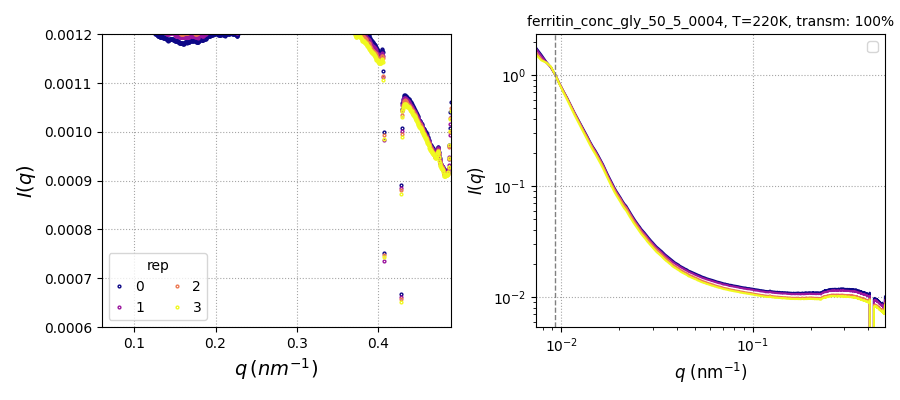

In [34]:
f, (a1,a2) = plt.subplots(1,2, figsize=(9,4), tight_layout=True)
col = plt.cm.plasma(np.linspace(0,1,len(reps)))

q_index = 170
qsel = 4

for i in range(len(reps)):
    y = Iqs_reps[i,:] - Iq_bkg/Iq_bkg[qsel] * Iqs_reps[i,qsel]
    # a1.plot(qI, y, ls='', marker='o',mfc='none', ms=2,  c=col[i], label=i)
    a1.plot(qI, gaussian_filter(y, sigma=1.5), ls='', marker='o',mfc='none', ms=2,  c=col[i], label=i)


# -- no bkg subtracted
for i in range(0,len(reps)):
    # a2.plot(qI, Iqs_reps[i,:]/t_exp, ls='-', c=col[i], label=i)
    a2.plot(qI, Iqs_reps[i,:]/Iqs_reps[i,qsel], ls='-', c=col[i], label=i)
    # a2.plot(q_bkg, Iq_bkg/Iq_bkg[qsel] * Iqs_reps[i,qsel],  c=col[i], ls='--', label='bkg')

# a2.plot(q_bkg, Iq_bkg/t_exp_bkg, c='k', ls='--', label='bkg')
a2.axvline(x=qI[qsel], c='gray', ls='--', lw=1)
a1.axvline(x=qI[qsel], c='gray', ls='--', lw=1)
# a2.axvline(x=3.5e-1, c='gray', ls='--', lw=1) # index 710

a1.set_xlabel(r'$q\,(nm^{-1}$)', fontsize=14)
a1.set_ylabel('$I(q)$', fontsize=14)
# a1.set_xscale('log')
# a1.set_yscale('log')
a1.legend(title='rep', handlelength=.7, frameon=True, fontsize=10, ncol=2)
a1.grid(ls=':', alpha=.7, c='gray')
a1.set_xlim(0.06,qI[-1])
# a1.set_ylim(1e-5,1e-3)
a1.set_ylim(6e-4,1.2e-3)

a2.legend(['sample', 'bkg'], [Line2D([0], [0], c='k', linewidth=1, linestyle=x) for x in ['-', '--']], handlelength=1)
a2.set_title(f"{sample}, T={T}K, transm: {Tr}%", fontsize=10)
a2.set_xlabel(r'$q$ (nm$^{-1}$)', fontsize=12)
a2.set_ylabel('$I(q)$', fontsize=12)
a2.set_xscale('log')
a2.set_yscale('log')
a2.set_xlim(qI[0],qI[-1])
# a2.set_xlim(.02,.5)
# a2.set_ylim(0,2e-3)


**Spots - Plot filtered good runs**

In [35]:
good_ind = np.empty(shape=len(reps), dtype=object)
for i in range(len(reps)):
    good_ind[i] = load_data(filename, f'/xpcs/good_indices_{i}')
scans = load_data(filename, '/saxs/scans')
np.shape(scans), np.shape(good_ind)


scan_per_rep = [[], [],  [], []]
for i in range(len(scans)):
    rep = i%4
    scan_per_rep[rep].append(scans[i])
#     print(i, rep, np.shape(reps))
np.shape(scan_per_rep)

(4, 112)

(0.6, 1.6)

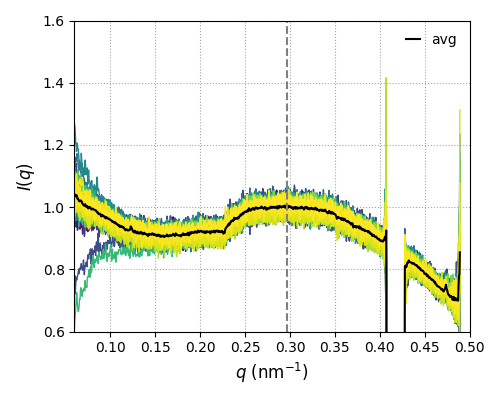

In [36]:
f, a1 = plt.subplots(1,1, figsize=(5,4), tight_layout=True)

rep = 0
qsel = 4
col = plt.cm.viridis(np.linspace(0,1,len(scan_per_rep[rep][:])))
Iq_good = []

for i in range(len(scan_per_rep[rep][:])):
    if good_ind[rep][i]:
        y = Iqs[scan_per_rep[rep][i]-1,:]
        yy = y - Iq_bkg/Iq_bkg[qsel]*y[qsel]
        
        a1.plot(qI, yy/yy[600], c=col[i], lw=1)
        Iq_good.append(yy/yy[600])

Iq_avg = np.mean(Iq_good, axis=0)
a1.plot(qI, Iq_avg, c='k', ls='-', label='avg')

# bkg
# y_bkg = Iq_bkg/t_exp_bkg*t_exp
# a1.plot(q_bkg, y_bkg, c='r', label='bkg')

a1.axvline(x=qI[qsel], c='gray', ls='--')
a1.axvline(x=qI[600], c='gray', ls='--')

a1.set_xlabel(r'$q$ (nm$^{-1}$)', fontsize=12)
a1.set_ylabel('$I(q)$', fontsize=12)
# a1.set_xscale('log')
# a1.set_yscale('log')
a1.legend(handlelength=1, frameon=False)
a1.set_xlim(0.06,0.5)
a1.set_ylim(6e-1,1.6e0)